In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [127]:
def coin_op(NW, NC):
    II = np.eye(NW,dtype='complex')
    C  = 2*np.ones((NC, NC))/NC - np.eye(NC)
    
    return np.kron(II,C)

def shift_op_cycle(NW,NC):
    S = np.zeros([NC*NW,NC*NW],dtype='complex')
    
#     aux_d = [0]
#     for y in range(NC-2):
#         aux_d.append((y+1))
#         aux_d.append(-(y+1))
    
    aux_d = np.arange(-(NC-1)/2,(NC-1)/2+1,dtype='int')
    
    for d in range(NC):
        coin_aux = np.zeros([NC,NC],dtype='complex')
        coin_aux[d,d] = 1
        
        shift_aux = np.zeros([NW,NW],dtype='complex')
        for x in range(NW):
            shift_aux[(x + aux_d[d])%NW,x] = 1
            
        
        S += np.kron(shift_aux, coin_aux)
    
    return S

def initial_cond(coin,nw,nc):
    i_aux  = np.zeros([nw,1],dtype='complex')
    i_aux[nw//2,0] = 1
    
    i_coin = np.zeros([nc,1],dtype='complex')
    for x in range(nc):
        i_coin[x,0] = coin[x]
        
    return np.kron(i_aux,i_coin)
  
def evolution(U,steps,initial,nw,nc):
    
    for t in range(steps):
        initial = U@initial
      
    final = np.zeros([nw,1])
    for x in range(nw):
        final[x] = np.sum(np.abs(initial[x*nc:(x*nc+nc),0])**2)
    
    return final

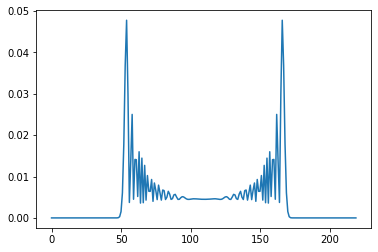

In [129]:
nw = 220
nc = 3
steps = 100

initial = initial_cond([1j,0,1]/np.sqrt(2),nw,nc)

C = coin_op(nw,nc)
S = shift_op_cycle(nw,nc)

probs = evolution(S@C,steps,initial,nw,nc)
plt.plot(probs)

In [126]:
d = 5
np.arange(-(d-1)/2,(d-1)/2+1,dtype='int')

array([-2, -1,  0,  1,  2])